---

# Default Estimator Analysis

## Introduction

### Overview

The "Default Estimator Analysis" notebook focuses on the calculation of RFMS (Recency, Frequency, Monetary, Sociality) metrics and the assignment of risk labels to customers based on these metrics. Additionally, it includes the performance of Weight of Evidence (WoE) binning and visualization of the results. This process is crucial for understanding customer behavior and identifying high-risk customers, which can be particularly useful in fraud detection and risk management.

### Objectives

1. **Calculate RFMS Metrics**:
   - Compute Recency, Frequency, Monetary, and Sociality metrics for each customer.
   - Combine these metrics into a single DataFrame.

2. **Calculate RFMS Scores**:
   - Normalize the RFMS metrics.
   - Compute a weighted RFMS score for each customer.

3. **Assign Risk Labels**:
   - Assign risk labels (e.g., 'Good' or 'Bad') based on the RFMS scores.
   - Visualize the distribution of risk labels.

4. **Perform WoE Binning**:
   - Perform Weight of Evidence (WoE) binning on the RFMS metrics.
   - Visualize the WoE binning results to understand the relationship between the metrics and the risk labels.

5. **Merge Data**:
   - Merge the RFMS metrics and risk labels back with the original dataset.
   - Save the final processed data for further analysis.

6. **Feature Importance Analysis**:
   - Calculate Information Value (IV) and Weight of Evidence (WoE) for each feature.
   - Identify and drop features with low predictive power.

### Step-by-Step Analysis

1. **Data Loading and Preprocessing**:
   - Load the processed data from a CSV file.
   - Convert the `TransactionStartTime` column to a datetime type to ensure it is in the correct format for calculations.

2. **Calculate RFMS Metrics**:
   - Compute the Recency (days since the last transaction) for each customer.
   - Compute the Frequency (number of transactions) for each customer.
   - Compute the Monetary (total transaction amount) for each customer.
   - Compute the Sociality (standard deviation of transaction amounts) for each customer.
   - Combine these metrics into a single DataFrame.

3. **Calculate RFMS Scores**:
   - Normalize the Recency and Frequency metrics using MinMaxScaler.
   - Compute a weighted RFMS score for each customer, where the weights are assigned based on the importance of each metric.
   - Display the top few rows of the DataFrame to verify the calculated scores.

4. **Assign Risk Labels**:
   - Determine thresholds for the RFMS scores to assign risk labels.
   - Assign 'Good' or 'Bad' risk labels based on the thresholds.
   - Visualize the distribution of risk labels to understand the balance between 'Good' and 'Bad' customers.

5. **Perform WoE Binning**:
   - Convert the risk labels to binary numeric values (1 for 'Good', 0 for 'Bad').
   - Perform WoE binning on the RFMS metrics using the `scorecardpy` library.
   - Visualize the WoE binning results for each metric to understand the relationship between the metrics and the risk labels.

6. **Merge Data**:
   - Ensure the RFMS metrics and risk labels are unique to each customer.
   - Drop any existing RFMS columns from the original dataset.
   - Merge the RFMS metrics and risk labels back with the original dataset.
   - Display a sample of the merged data to verify the merge.

7. **Feature Importance Analysis**:
   - Calculate the Information Value (IV) and Weight of Evidence (WoE) for each feature.
   - Summarize the results and identify features with low predictive power.
   - Drop features with low IV to reduce dimensionality and improve model performance.

8. **Save the Final Processed Data**:
   - Save the final processed data to a CSV file for use in subsequent analysis.

### Conclusion

By following the steps outlined in this notebook, we will calculate RFMS metrics, compute RFMS scores, assign risk labels, perform WoE binning, and merge the data back with the original dataset. This will provide a comprehensive understanding of customer behavior and risk, which can be used for further analysis and predictive modeling tasks. The final processed data will be saved for use in subsequent notebooks.

In [ ]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath('..')))
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
# default_estimator_analysis.ipynb
import pandas as pd
import numpy as np
from src.default_estimator import DefaultEstimator

In [3]:
# Load the processed data
df = pd.read_csv('../data/processed/feature_engineered_data.csv')
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

In [4]:
# Initialize the defaultestimator
estimator = DefaultEstimator(df)

In [5]:
# Calculate RFMS
rfms = estimator.calculate_rfms()

In [6]:
estimator.display_header()

   CustomerId  Recency  Frequency   Monetary  Sociality
0         647     2110        675  62.180839   0.000839
1        4033     2121        259  23.872585   0.001345
2        3613     2109         79   7.272283   0.000187
3        3165     2122          9   0.829462   0.000996
4        1768     2120         25   2.304339   0.000485


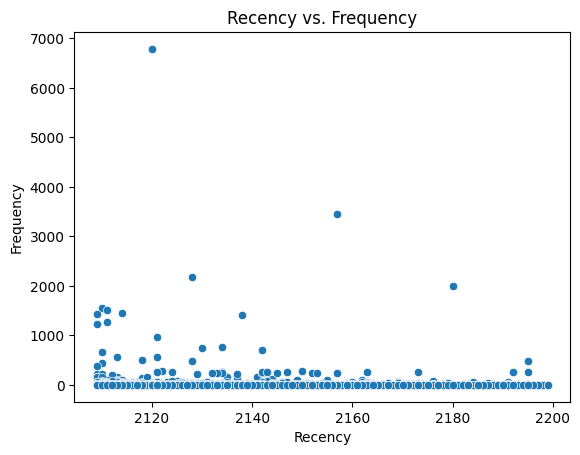

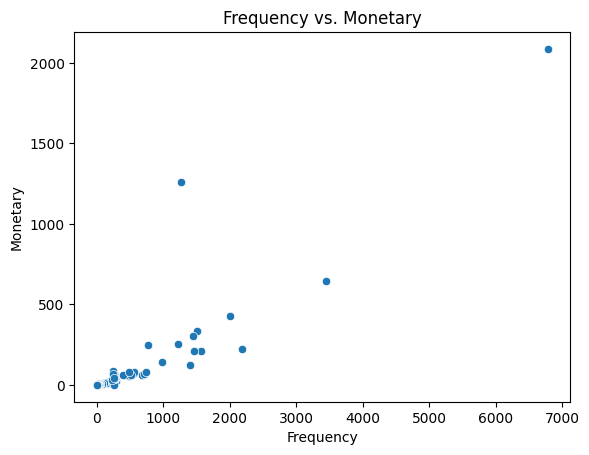

In [7]:
estimator.plot_rfms()

In [8]:
# Calculate RFMS score
estimator.calculate_rfms_score()

In [9]:
# Assign risk labels
rfms = estimator.assign_risk_labels()

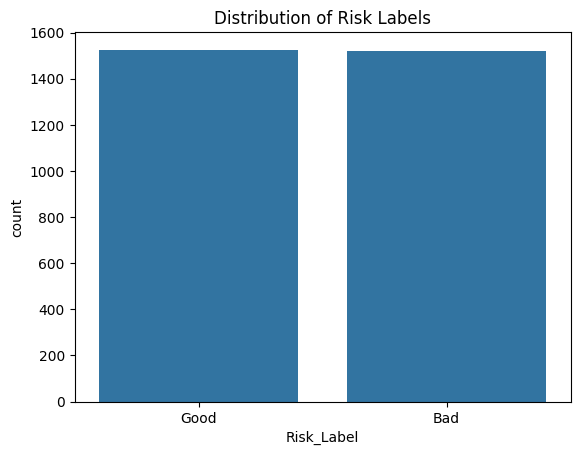

In [10]:
# Visualize risk label distribution
estimator.visualize_risk_label_distribution()

[INFO] creating woe binning ...
Binning on 3044 rows and 5 columns in 00:00:12


<Figure size 1000x600 with 0 Axes>

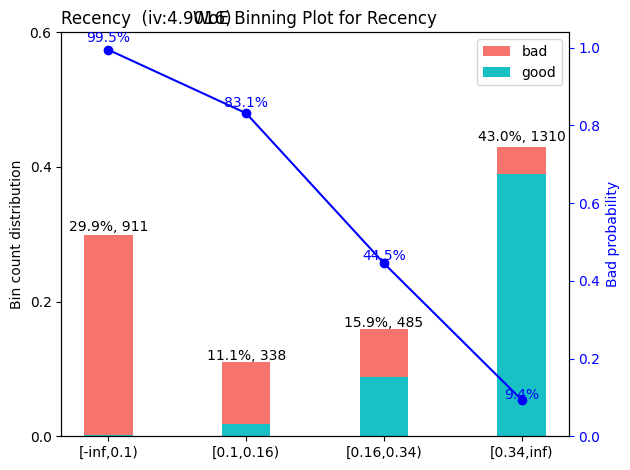

<Figure size 1000x600 with 0 Axes>

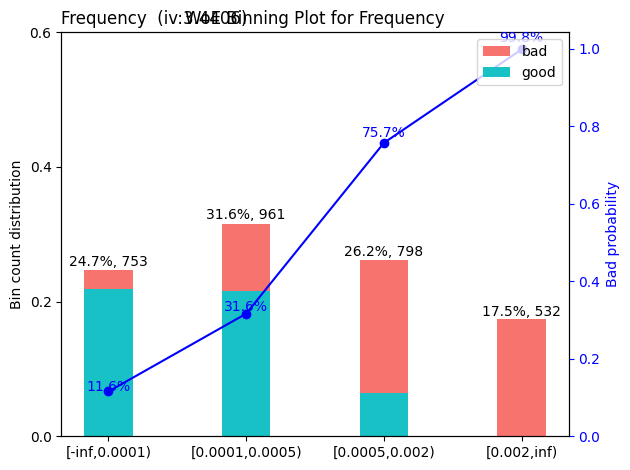

<Figure size 1000x600 with 0 Axes>

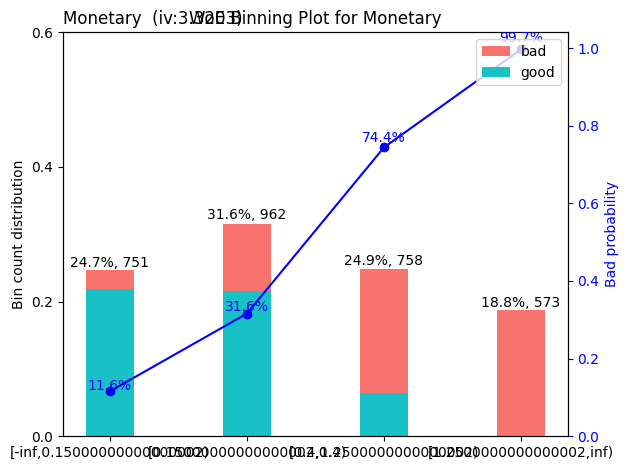

<Figure size 1000x600 with 0 Axes>

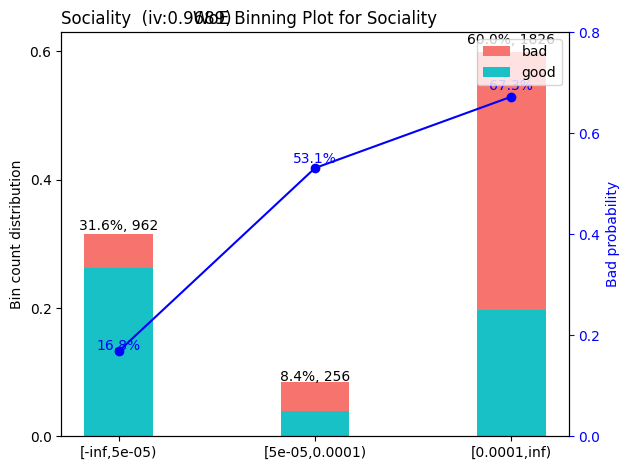

In [11]:
# Perform WoE binning
estimator.perform_woe_binning()

In [12]:
merged_data = estimator.merge_data()

In [13]:
# Retrieve the processed data
processed_data = estimator.get_processed_data()

In [14]:
# Display or use the processed data
processed_data.head()
processed_data.columns

Index(['CustomerId', 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
       'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy',
       'TransactionStartTime_Month', 'TransactionStartTime_Day',
       'TransactionStartTime_Dayofweek', 'TransactionStartTime_Is_month_end',
       'TransactionStartTime_Hour', 'TransactionStartTime_Minute',
       'TransactionStartTime_Elapsed', 'ProviderId_1', 'ProviderId_3',
       'ProviderId_4', 'ProviderId_5', 'ProviderId_6', 'ProductId_1',
       'ProductId_2', 'ProductId_3', 'ProductId_4', 'ProductId_6',
       'ProductId_7', 'ProductId_8', 'ProductId_9', 'ProductId_10',
       'ProductId_11', 'ProductId_13', 'ProductId_14', 'ProductId_15',
       'ProductId_19', 'ProductId_20', 'ProductId_24',
       'ProductCategory_airtime', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_ticket', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'Channel

Here we have to drop some personal features including features that we are used to determine risk_label because if we use this feature as they are higly corelated to our target variable we may face data leakage.

In [ ]:
columns_to_drop = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'Value', 
                   'TransactionStartTime', 'LastAccess']

In [16]:
processed_data = processed_data.drop(columns=columns_to_drop, axis=1)

In [17]:
processed_data = processed_data.set_index('CustomerId')

In [18]:
# Calculate IV, WoE, and get summary and key points
final_summary, key_points = estimator.iv_woe_summary(processed_data, target='Risk_Label', bins=10, show_woe=False)

# Print the final summary
print("Final Summary:")
print(final_summary)

Final Summary:
                              Variable        IV  \
0                               Amount  2.542216   
1                      PricingStrategy  0.197257   
2           TransactionStartTime_Month  0.997212   
3             TransactionStartTime_Day  0.178339   
4       TransactionStartTime_Dayofweek  0.160503   
5    TransactionStartTime_Is_month_end  0.018752   
6            TransactionStartTime_Hour  0.045200   
7          TransactionStartTime_Minute  0.021657   
8         TransactionStartTime_Elapsed  1.490401   
9                         ProviderId_1  0.012969   
10                        ProviderId_3  0.096541   
11                        ProviderId_4  0.106372   
12                        ProviderId_5  0.034651   
13                        ProviderId_6  0.029617   
14                         ProductId_1  0.009293   
15                         ProductId_2  0.001847   
16                         ProductId_3  0.002789   
17                         ProductId_4  0.022563 

In [19]:
# Print key points and suggestions
print("\nKey Points and Suggestions:")
for point in key_points:
    print(point)


Key Points and Suggestions:
Amount: IV = 2.542216 - Suspicious predictive power. Check for overfitting or data leakage.
PricingStrategy: IV = 0.197257 - Medium predictive power.
TransactionStartTime_Month: IV = 0.997212 - Suspicious predictive power. Check for overfitting or data leakage.
TransactionStartTime_Day: IV = 0.178339 - Medium predictive power.
TransactionStartTime_Dayofweek: IV = 0.160503 - Medium predictive power.
TransactionStartTime_Is_month_end: IV = 0.018752 - Not useful for prediction.
TransactionStartTime_Hour: IV = 0.045200 - Weak predictive power.
TransactionStartTime_Minute: IV = 0.021657 - Weak predictive power.
TransactionStartTime_Elapsed: IV = 1.490401 - Suspicious predictive power. Check for overfitting or data leakage.
ProviderId_1: IV = 0.012969 - Not useful for prediction.
ProviderId_3: IV = 0.096541 - Weak predictive power.
ProviderId_4: IV = 0.106372 - Medium predictive power.
ProviderId_5: IV = 0.034651 - Weak predictive power.
ProviderId_6: IV = 0.0296

In [20]:
# Drop columns with low IV
cols_to_drop = estimator.drop_unused_columns(final_summary, threshold=0.02)
print("\nColumns to drop:")
print(cols_to_drop)


Columns to drop:
['TransactionStartTime_Is_month_end', 'ProviderId_1', 'ProductId_1', 'ProductId_2', 'ProductId_3', 'ProductId_7', 'ProductId_8', 'ProductId_11', 'ProductId_14', 'ProductId_19', 'ProductCategory_data_bundles', 'ProductCategory_tv', 'ProductCategory_utility_bill', 'ChannelId_5']


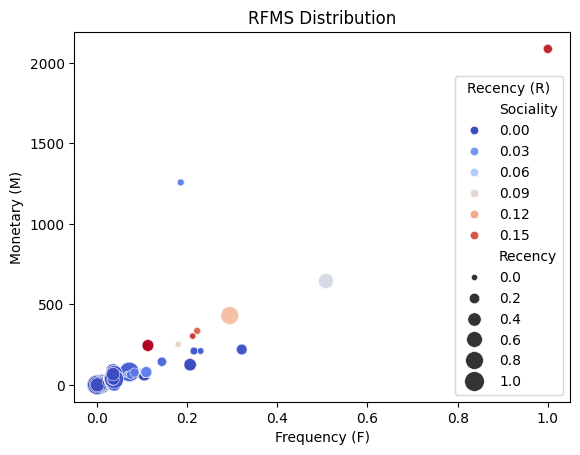

In [ ]:
# Example visualization
sns.scatterplot(data=processed_data, x='Frequency', y='Monetary', hue='Sociality', size='Recency', palette='coolwarm', sizes=(20, 200))
plt.title("RFMS Distribution")
plt.xlabel('Frequency (F)')
plt.ylabel('Monetary (M)')
plt.legend(title='Recency (R)')
plt.show()

In [25]:
# Drop the columns from the dataset
processed_data = processed_data.drop(columns=cols_to_drop, errors='ignore')

# Display the first few rows of the updated dataset
print("\nProcessed Data after dropping columns:")
processed_data.head()


Processed Data after dropping columns:


,Amount,PricingStrategy,TransactionStartTime_Month,TransactionStartTime_Day,TransactionStartTime_Dayofweek,TransactionStartTime_Hour,TransactionStartTime_Minute,TransactionStartTime_Elapsed,ProviderId_3,ProviderId_4,...,ProductCategory_ticket,ChannelId_2,ChannelId_3,FraudResult,Recency,Frequency,Monetary,Sociality,RFMS_Score,Risk_Label
CustomerId,,,,,,,,,,,,,,,,,,,,,
647,0.092004,2,12,19,2,20,11,1545250299,0.0,0.0,...,0.0,0.0,1.0,0,0.011111,0.099337,62.180839,0.000839,12.861608,1
4033,0.092004,2,1,3,3,10,10,1546510213,0.0,0.0,...,0.0,0.0,1.0,0,0.133333,0.038025,23.872585,0.001345,5.132726,1
3613,0.091907,2,1,1,1,17,40,1546364435,0.0,1.0,...,0.0,1.0,0.0,0,0.000000,0.011496,7.272283,0.000187,1.857924,1
3165,0.091908,2,12,7,4,7,2,1544166125,0.0,1.0,...,0.0,1.0,0.0,0,0.144444,0.001179,0.829462,0.000996,0.508568,1
1768,0.092371,2,2,2,5,12,5,1549109139,0.0,0.0,...,0.0,0.0,0.0,0,0.122222,0.003537,2.304339,0.000485,0.813089,1


In [26]:
# Save the processed data
processed_data.to_csv('../data/processed/default_estimated_data.csv', index=True)